In [41]:
!pip install sta663yw261==2.0.0

  Found existing installation: sta663yw261 1.9.0
    Uninstalling sta663yw261-1.9.0:
      Successfully uninstalled sta663yw261-1.9.0
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [19]:
from pkg import dist,k_means_pp
from pkg import scalable_k_means_pp
from pkg import k_means,k_means_int 

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = iris.data[:, :4]
X = iris
k=3
l=2

## use random initilization

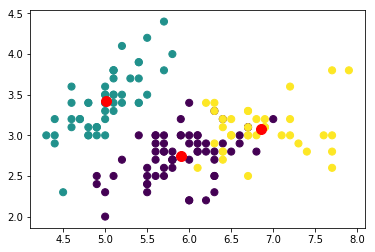

In [42]:
C1 = k_means_int.k_means_int(k,X)
centers, labels = k_means.k_means(3,X,C1)[:2]
plt.scatter(X[:,0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:,1], s = 100, c = 'red', label = 'Centroids')

### use k means plus plus initiliazation

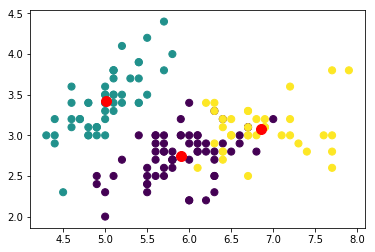

In [43]:
C2 = k_means_pp.kmeanspp(k,X)
centers, labels = k_means.k_means(3,X,C1)[:2]
plt.scatter(X[:,0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:,1], s = 100, c = 'red', label = 'Centroids')

### use k means|| initiliazation

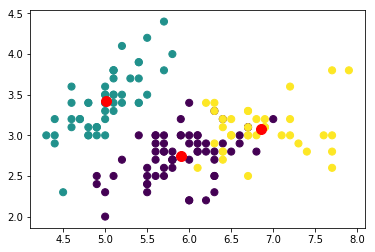

In [44]:
C3 = scalable_k_means_pp.k_meansll(k,X,42)
centers, labels = k_means.k_means(3,X,C1)[:2]
plt.scatter(X[:,0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:,1], s = 100, c = 'red', label = 'Centroids')

## compare the true and predicted clusters

In [45]:
np.random.seed(42)
mean1=[0,0]
cov1=np.array([[1, 0], [0, 1]])
sample1 = np.random.multivariate_normal(mean1, cov1, 200)

mean2=[12,12]
cov2=np.array([[1, 0], [0, 1]])
sample2 = np.random.multivariate_normal(mean2, cov2, 200)

mean3=[8,8]
cov3=np.array([[1, 0], [0, 1]])
sample3 = np.random.multivariate_normal(mean3, cov3, 200)

mean4=[5,5]
cov4=np.array([[1, 0],[0, 1]])
sample4 = np.random.multivariate_normal(mean4, cov4, 200)

In [33]:
sample=np.vstack((sample1,sample2,sample3,sample4))
true_cen=np.vstack((mean1,mean2,mean3,mean4))
C1=k_means_pp.kmeanspp(4,sample)
pred_cen1=np.array(k_means.k_means(4,sample,C1)[0])

(-2, 15)

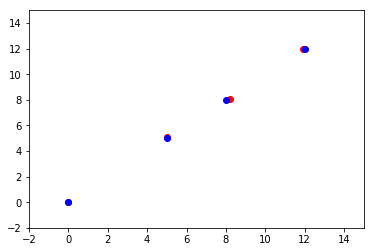

In [38]:
plt.figure()
plt.plot(pred_cen1[:,0],pred_cen1[:,1],"ro")
plt.plot(true_cen[:,0],true_cen[:,1],"ro",color="blue")
plt.xlim(-2,15)
plt.ylim(-2,15)

In [39]:
C2=scalable_k_means_pp.k_meansll(4,sample,2)
predict_center2=np.array(k_means.k_means(4,sample,C2)[0])

(-2, 15)

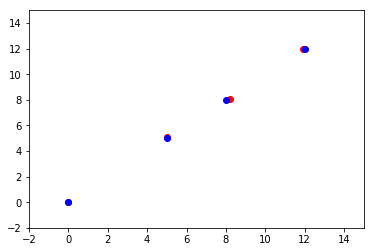

In [40]:
plt.figure()
plt.plot(pred_cen1[:,0],pred_cen1[:,1],"ro")
plt.plot(true_cen[:,0],true_cen[:,1],"ro",color="blue")
plt.xlim(-2,15)
plt.ylim(-2,15)